# Logisitic Regression and Decisions Trees

#### 1) Logistic Regression

In [1]:
# Import package/module for data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

dat = pd.read_csv("ionosphere.csv") # Read in the data, csv
print("Original dataset shape:", dat.shape)

# Define X and Y
X = dat.drop("class", axis = 1)  # Remove the response from the other predictor variables
y = dat["class"] # Only keep the response variable

# Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 151, random_state = 12)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run

Original dataset shape: (351, 35)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the pipeline
pipe_logistic = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(penalty = "none", solver = "saga", tol = 0.1, random_state = 10))
])

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LogisticRegression: Applying a logistic regression model.
#   penalty: Parameter is set to "none" indicating that no regularization is applied
#    solver: A stochastic gradient-based solver
#     to1: Controls the tolerance for stopping criteria.
#      random_state: Used for reproducibility

In [5]:
from sklearn.metrics import accuracy_score

# Fit pipeline to training data
pipe_logistic.fit(X_train, y_train) # Fit it to the training data

# Predict pipeline to training data
y_train_pred = pipe_logistic.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions
print("Logistic --- Accuracy on training:", acc)

# Predict pipeline to test data
y_test_pred = pipe_logistic.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions
print("Logistic --- Accuracy on test:", np.round(acc, 3))

Logistic --- Accuracy on training: 0.895
Logistic --- Accuracy on test: 0.861


C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [6]:
from sklearn.model_selection import KFold

# Define folds
folds = KFold(n_splits = 10, shuffle = True, random_state = 919) # The data will be randomly shuffled before the cross-validation splits are created.
# This helps to prevent bias due to any inherent order in the data.

In [7]:
# Define pipeline
pipe_logistic_l1 = Pipeline(
    [("scaler", StandardScaler()),
     ("logistic", LogisticRegression(C = 1, penalty = "l1", solver = "saga", tol = 0.1, random_state = 10))]
)

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features to have mean 0, SD 1.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LogisticRegression: Applying a logistic regression model.
#   C: The inverse of the regularization strength, where larger values indicate less regularization.
#    penalty: Parameter is set to "none" indicating that no regularization is applied
#     solver: A stochastic gradient-based solver
#      to1: Controls the tolerance for stopping criteria.
#       random_state: Used for reproducibility

In [8]:
from sklearn.model_selection import GridSearchCV

# Define CV object
# grid = np.logspace(-10, 10, 10)
grid = np.logspace(-2, 1, 100) # Geometrically linear spaced data (0 to 10)
logistic_l1_cv = GridSearchCV(
    estimator = pipe_logistic_l1,
    param_grid = {"logistic__C": grid},
    scoring = "accuracy",
    cv = folds,
)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: Used for cross-validation. "neg_mean_squared_error" is the negative mean squared error.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set
#    This data is shuffled and set randomly at 42

In [9]:
logistic_l1_cv.fit(X_train, y_train) # Fitting the logistic regression model to training data

GridSearchCV(cv=KFold(n_splits=10, random_state=919, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(C=1, penalty='l1',
                                                           random_state=10,
                                                           solver='saga',
                                                           tol=0.1))]),
             param_grid={'logistic__C': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02...
        0.93260335,  1.        ,  1.07226722,  1.149757  ,  1.23284674,
        1.32194115,  1.41747416,  1.51991108,  1.62975083,  1.7475284 ,
        1.87381742,  2.009233  ,  2.15443469,  2.3101297 ,  2.47707636,
        2.65608778,  2.84803587,  3.05385551,  3.27454916,  3.51119173,
        3.76493581,  4.03701726,  4.32876128,  4.64158883,  4.97702356,
        5.33669923,  5.72236766,  6.13590727,  6.57933225,  7.05480231,
        7.56463328,  8.11130831,  8.69749003,  9.32603347, 10.        ])},
             scoring='accuracy')

In [10]:
pd.DataFrame(logistic_l1_cv.cv_results_).head(5) # Contains results from CV

# mean_test_score: The mean accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#  mean_train_score: The mean accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#   std_test_score: The standard deviation of the accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#    std_train_score: The standard deviation of the accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#     params: A dictionary of the hyperparameters used for that particular combination.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008346,0.005134,0.002185,0.003275,0.01,{'logistic__C': 0.01},0.65,0.75,0.6,0.75,0.6,0.6,0.5,0.65,0.45,0.6,0.615,0.089582,90
1,0.009538,0.005792,0.003566,0.003730,0.010723,{'logistic__C': 0.010722672220103232},0.65,0.75,0.6,0.75,0.6,0.6,0.5,0.65,0.45,0.6,0.615,0.089582,90
2,0.005714,0.004121,0.000594,0.000950,0.011498,{'logistic__C': 0.011497569953977356},0.65,0.75,0.6,0.75,0.6,0.6,0.5,0.65,0.45,0.6,0.615,0.089582,90
3,0.004719,0.004262,0.001318,0.002575,0.012328,{'logistic__C': 0.012328467394420659},0.65,0.75,0.6,0.75,0.6,0.6,0.5,0.65,0.45,0.6,0.615,0.089582,90
4,0.004044,0.003995,0.001882,0.002962,0.013219,{'logistic__C': 0.013219411484660288},0.65,0.75,0.6,0.75,0.6,0.6,0.5,0.65,0.45,0.6,0.615,0.089582,90


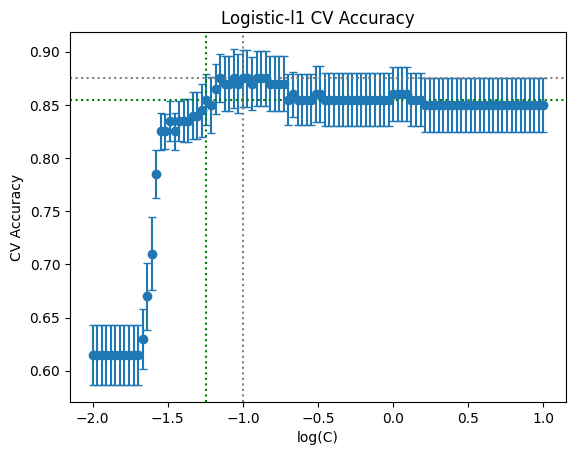

In [11]:
# Plot results of cross-validation
# Choose best model that minimizes cv_err/according to the 1-SE error
cv_res = logistic_l1_cv.cv_results_

mean_scores = cv_res["mean_test_score"] # Extracts the mean test scores
se_scores = cv_res["std_test_score"] / np.sqrt(logistic_l1_cv.n_splits_) # Standard error of test scores, ! Very important to divide by sqrt(# folds)
params = cv_res["param_logistic__C"].data # Corresponding values of the hyperparameter

best_index = np.argmax(mean_scores) # Identifies the index of the best mean test score

one_se_best_param = np.min( # Calculates the value of C that is one standard error away from the best value
    grid[mean_scores >= mean_scores[best_index] - se_scores[best_index]]
)

one_se_score = mean_scores[grid == one_se_best_param][0] # Calculates the corresponding mean test score at that value of C

# just for reference, we also plot the parameter that maximizes the cross-validated accuracy
best_param = logistic_l1_cv.best_params_["logistic__C"]
best_score = logistic_l1_cv.best_score_

plt.errorbar(x = np.log10(grid), y = mean_scores, yerr = se_scores, fmt = "o", capsize = 3)
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.

# plt.errorbar(x=(grid), y=mean_scores, yerr=se_scores, fmt="o", capsize=3)
# plt.xscale('log')

plt.axvline(np.log10(best_param), ls="dotted", color="grey")  # Vertical line at the parameter value yielding highest accuracty
plt.axhline(best_score, ls="dotted", color="grey")  # Horizontal line at highest accuracy
plt.axvline(np.log10(one_se_best_param), ls="dotted", color="green")  # Vertical line at the parameter corresponding to 1-SE
plt.axhline(one_se_score, ls="dotted", color="green")  # Horizontal line at corresponding to 1-SE parameter

plt.title("Logistic-l1 CV Accuracy") # Label title
plt.xlabel("log(C)") # Label x-axis
plt.ylabel("CV Accuracy") # Label y-axis
plt.show()

In [12]:
pipe_logistic_l1.set_params(logistic__C = 10 ** (-8)) # Sets the regularization parameter C of a logistic regression model with L1 penalty to 10^(-8)
pipe_logistic_l1.fit(X_train, y_train) # Fits the model using training data
logEst = pipe_logistic_l1.named_steps['logistic'] # A pipeline object that includes a LogisticRegression estimator with L1 penalty
logEst.coef_ # Produces an array containing the learned coefficients of the logistic regression model

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [13]:
# Take best model
pipe_logistic_l1.set_params(logistic__C = one_se_best_param, logistic__penalty = "l1")

# Fit on training data
pipe_logistic_l1.fit(X_train, y_train)

# Predict on training
y_pred = pipe_logistic_l1.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_pred) # Calculate the accuracy of the predictions
print("Logistic l1 --- Accuracy on training:", acc)

# Predict on test
y_pred = pipe_logistic_l1.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_pred) # Calculate the accuracy of the predictions
print("Logistic l1 --- Accuracy on test:", np.round(acc, 3))

Logistic l1 --- Accuracy on training: 0.855
Logistic l1 --- Accuracy on test: 0.821


In [14]:
# Model interpretability
print("Logistic --- Number of predictors:", np.sum(pipe_logistic["logistic"].coef_ != 0)) # Selecting the column names of a Pandas DataFrame X that have non-zero coefficients in the model
print("Logistic l1 --- Number of predictors:", np.sum(pipe_logistic_l1["logistic"].coef_ != 0)) # Selecting the column names of a Pandas DataFrame X that have non-zero coefficients in the model

Logistic --- Number of predictors: 33
Logistic l1 --- Number of predictors: 5


In [15]:
# To extract names of significant predictors
# Selecting the columns of the training data that have non-zero coefficients in two logistic regression models with different penalty types.
ind_logistic = (pipe_logistic["logistic"].coef_ != 0).ravel()
ind_logistic_pen = (pipe_logistic_l1["logistic"].coef_ != 0).ravel()
# ravel: Convert the boolean array into a 1D array
cols = X_train.columns.to_numpy() # An array of the column names of the training data
cols[ind_logistic] # Selects the column names where ind_logistic is True
cols[ind_logistic_pen] # Selects the column names where ind_logistic_pen is True

array(['a01', 'a03', 'a05', 'a07', 'a08'], dtype=object)

#### 2) Decision Trees

** Objective **

The response variable that will be attempted to predict is "AHD", indicating whether the patient has a heart disease.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [17]:
heart = pd.read_csv('Heart_ISL.csv').dropna().reset_index(drop = True).astype({
    'ChestPain': 'category',
    'Thal': 'category',
    'AHD': 'category',
})

# Read in the data, csv
#  .dropna():Rmove any rows with missing data
#   .reset_index(drop=True): Reset the index of the resulting DataFrame after the rows with missing data are dropped
#    .astype(): Convert the data types of some of the columns to category

heart.info() # Prints concise summary of a DataFrame
heart.head() # Display the first # of rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  297 non-null    int64   
 1   Age         297 non-null    int64   
 2   Sex         297 non-null    int64   
 3   ChestPain   297 non-null    category
 4   RestBP      297 non-null    int64   
 5   Chol        297 non-null    int64   
 6   Fbs         297 non-null    int64   
 7   RestECG     297 non-null    int64   
 8   MaxHR       297 non-null    int64   
 9   ExAng       297 non-null    int64   
 10  Oldpeak     297 non-null    float64 
 11  Slope       297 non-null    int64   
 12  Ca          297 non-null    float64 
 13  Thal        297 non-null    category
 14  AHD         297 non-null    category
dtypes: category(3), float64(2), int64(10)
memory usage: 29.3 KB


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [18]:
X = pd.get_dummies(heart.drop("AHD", axis = 1), drop_first = True) # Remove the response from the other predictor variables
# get_dummies: Converts categorical variables into dummy/indicator variables
#  drop_first = True: Drops the first category of each categorical variable to avoid creating a "dummy variable trap".

y = heart["AHD"]  # Only keep the response variable

In [19]:
# Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run

#### 3) Unpruned Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
tree_full = DecisionTreeClassifier(criterion = 'entropy') # Gini entropy
# Creates a new decision tree classifier object
#  criterion = 'entropy': Specifies that the decision tree should use entropy as the measure of impurity when splitting nodes
tree_full.fit(X_train, y_train) # Fits the decision tree to the training data

DecisionTreeClassifier(criterion='entropy')

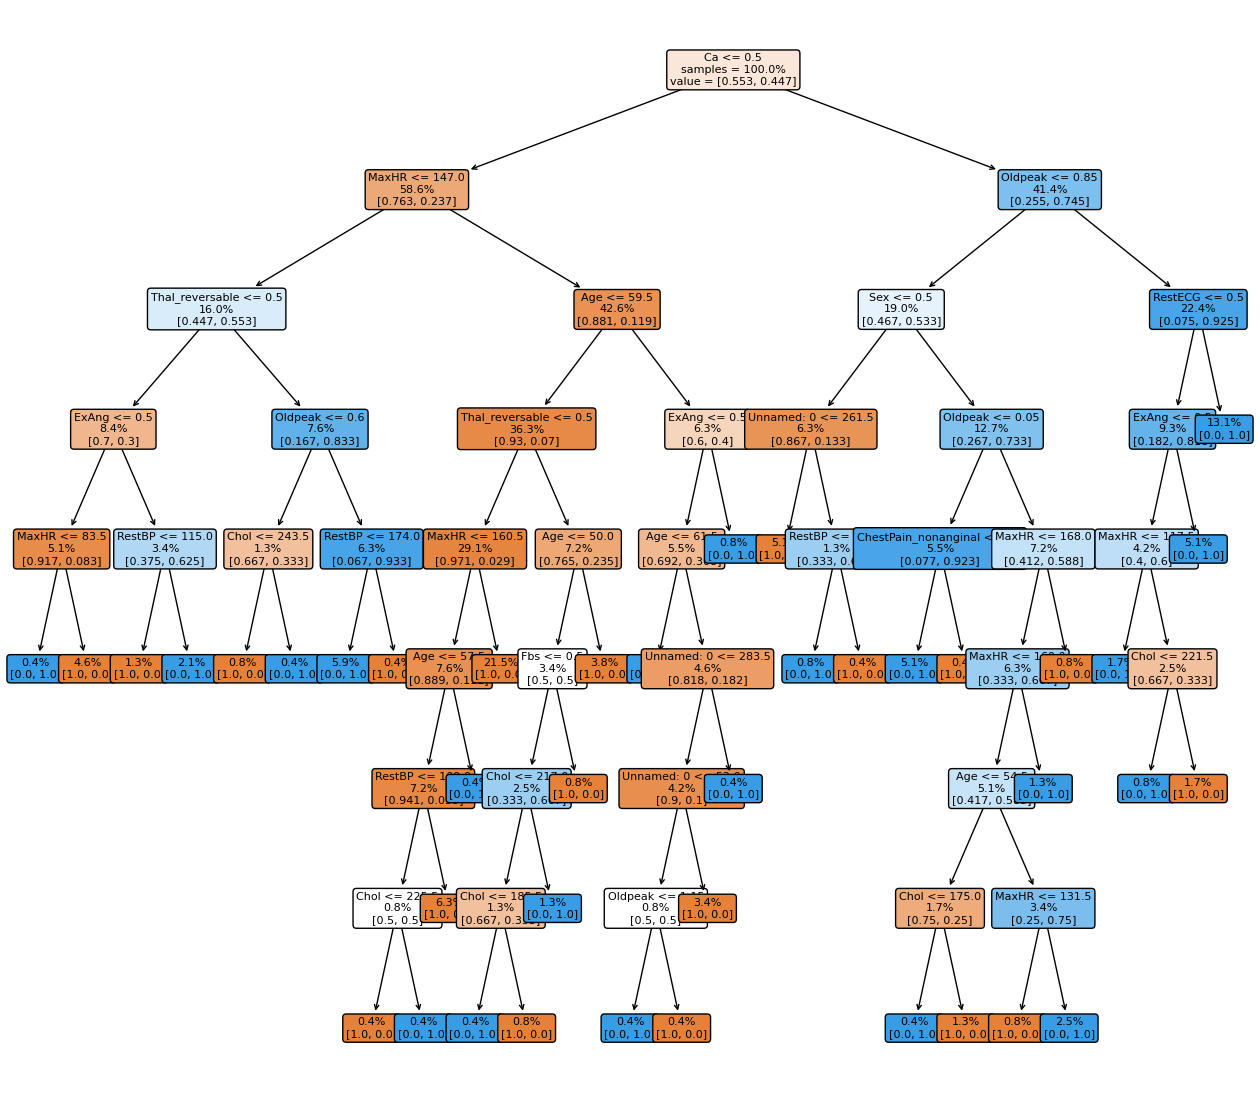

In [22]:
plt.figure(figsize = (16,14)) # Creates a new matplotlib figure with a size of 16 inches by 14 inches.
plot_tree(tree_full, feature_names = X_train.columns.tolist(), impurity = False, label = "root",
          filled = True, proportion = True, rounded = True, fontsize = 8)
# feature_names=X_train.columns.tolist(): Provides the names of the features (i.e., the independent variables) to use as labels for the nodes in the decision tree.
#  impurity = False: Specifies that we don't want to show the impurity (i.e., entropy or Gini index) for each node in the tree.
#   label = "root": Specifies that the root node should be labeled as "root".
#    filled = True: Specifies that we want to color the nodes in the tree based on the majority class of the training samples that fall within them.
#     proportion = True: Specifies that we want to show the proportion of training samples in each node that belong to each class.
#      rounded = True: Specifies that we want to round the corners of the boxes that represent nodes in the tree.
#       fontsize = 8: Specifies the font size to use for the text in the plot.
plt.show() # Displays the plot of the decision tree.

In [23]:
print("Train accuracy:", tree_full.score(X_train,y_train)) # Prints the accuracy of the decision tree model on both the training set.
print("Test accuracy:", tree_full.score(X_test,y_test)) # Prints the accuracy of the decision tree model on both the testing set.

Train accuracy: 1.0
Test accuracy: 0.7166666666666667


#### 4) Cost-complexity Pruning

The flexibility of a decision tree can be tuned by pruning it via cost-complexity pruning.

In [24]:
path = tree_full.cost_complexity_pruning_path(X_train, y_train) # Computes the cost complexity pruning path for the decision tree model on the training data
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# path.ccp_alphas: Extracts the complexity parameter values from the pruning path.
#  path.impurities: Extracts the corresponding total impurities (sum of the impurities of all leaves) from the pruning path.
#   The result is two arrays: ccp_alphas, which contains the complexity parameter values, and impurities, which contains the corresponding total impurities at each pruning level.

In [25]:
# Set the range of values for the complexity parameter ccp_alpha that will be used in a grid search for hyperparameter tuning.
grid_alphas = ccp_alphas # Represent a range of pruning levels for the decision tree.
grid_alphas = np.logspace(-5, 1, 100) # Creates a new array of ccp_alpha values using NumPy's logspace function, which generates a range of values logarithmically spaced between 10**-5 and 10**1, inclusive. The 100 argument specifies that we want 100 values evenly spaced on the logarithmic scale between these two endpoints.
# The reason for generating a new array of ccp_alpha values using logspace is to explore a broader range of hyperparameter values than just those computed by cost_complexity_pruning_path.
# The grid search will evaluate the performance of the decision tree model using each of these hyperparameter values, and return the best-performing value.

In [26]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1) # The data will be randomly shuffled before the cross-validation splits are created.
# This helps to prevent bias due to any inherent order in the data.
tree_full = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0)
# Creates a new decision tree classifier object
#  criterion = 'entropy': Specifies that the decision tree should use entropy as the measure of impurity when splitting nodes
#   ccp_alpha: Parameter of the decision tree to 0, which means that no cost complexity pruning is applied to the tree.
hyper_params = {"ccp_alpha": grid_alphas} # Create hyperparameter, dictionary
treeCV = GridSearchCV(estimator = tree_full, # Specifies the estimator to be tuned, which is the ridge_reg_pipe pipeline object containing the Ridge regression model
                      param_grid = hyper_params, # Parameter specifies the grid of hyperparameters to search over. It should be a dictionary or a list of dictionaries containing the hyperparameters to be tuned and their corresponding values.
                      cv = folds) # Specifies the cross-validation strategy to be used.

In [27]:
treeCV.fit(X_train, y_train) # Fit the tree model on training set

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy'),
             param_grid={'ccp_alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01])})

In [28]:
pd.DataFrame(treeCV.cv_results_).head(5) # Contains results from CV

# mean_test_score: The mean accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#  mean_train_score: The mean accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#   std_test_score: The standard deviation of the accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#    std_train_score: The standard deviation of the accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#     params: A dictionary of the hyperparameters used for that particular combination.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005035,0.003950,0.001815,0.002058,0.00001,{'ccp_alpha': 1e-05},0.666667,0.708333,0.750000,0.750000,0.708333,0.500000,0.708333,0.695652,0.739130,0.826087,0.705254,0.079682,35
1,0.004059,0.004444,0.002255,0.003466,0.000011,{'ccp_alpha': 1.1497569953977357e-05},0.750000,0.708333,0.791667,0.666667,0.666667,0.666667,0.750000,0.652174,0.739130,0.782609,0.717391,0.049420,19
2,0.003221,0.004041,0.002818,0.004188,0.000013,{'ccp_alpha': 1.3219411484660286e-05},0.666667,0.708333,0.791667,0.708333,0.666667,0.583333,0.708333,0.652174,0.739130,0.739130,0.696377,0.054464,57
3,0.004810,0.003927,0.000000,0.000000,0.000015,{'ccp_alpha': 1.5199110829529332e-05},0.666667,0.708333,0.833333,0.583333,0.666667,0.666667,0.708333,0.739130,0.695652,0.695652,0.696377,0.060249,55
4,0.002066,0.002063,0.003397,0.003835,0.000017,{'ccp_alpha': 1.747528400007683e-05},0.708333,0.708333,0.791667,0.625000,0.708333,0.583333,0.708333,0.739130,0.739130,0.826087,0.713768,0.067068,24


In [29]:
# Choose best model that minimizes cv_err/according to the 1-SE error
resCV = treeCV.cv_results_ # Assigns the cross-validation results to the resCV dictionary object.

test_Misclasif = 1 - resCV["mean_test_score"]
std_mean_err_test = resCV["std_test_score"] / np.sqrt(10) # Calculates the standard error of the mean test score for each value of ccp_alpha
alpha_grid = resCV["param_ccp_alpha"].data # Retrieves the grid of ccp_alpha values used in the cross-validation from the resCV dictionary object.

index_best = treeCV.best_index_ # Retrieves the index of the best-performing model in the grid search from the treeCV object.
best_alpha = treeCV.best_params_["ccp_alpha"] # Retrieves the value of ccp_alpha that resulted in the best-performing model from the treeCV object.
one_se_rule_best_alpha = np.max(alpha_grid[test_Misclasif <= test_Misclasif[index_best] + std_mean_err_test[index_best]]) # Maximum value of alpha from among the set of alpha values for which the mean test score is less than or equal to the threshold_ridge.

print("Best alpha:", best_alpha)
print("Best 1se alpha:", one_se_rule_best_alpha)

Best alpha: 0.02848035868435802
Best 1se alpha: 0.037649358067924674


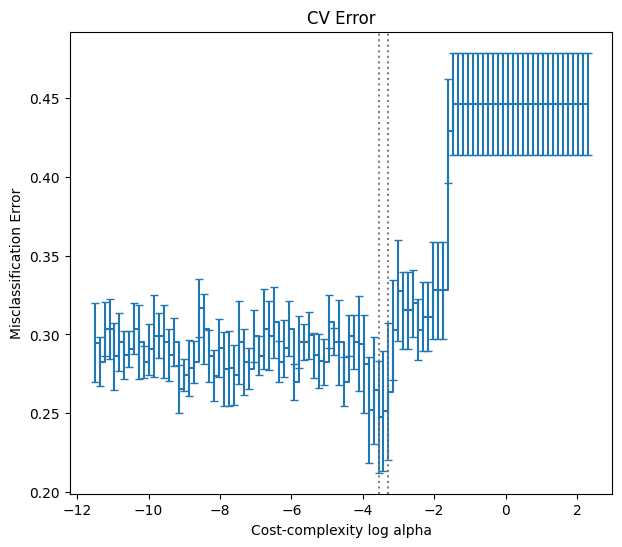

In [30]:
plt.figure(figsize = (7,6))
plt.errorbar(x = np.log(grid_alphas), y = test_Misclasif, yerr = std_mean_err_test, capsize = 3, drawstyle = "steps-post") #, fmt='o'
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.
# drawstyle: Specifies the style of the plot line to be a step function that only draws the line between the points

plt.axvline(np.log(best_alpha), ls = 'dotted', color = "grey") # Vertical line at the k yielding minimum CV MSE
plt.axvline(np.log(one_se_rule_best_alpha), ls = 'dotted', color = "grey") # Vertical line at best k value according to 1 std err rule

plt.title("CV Error") # Label the plot with a title
plt.xlabel('Cost-complexity log alpha') # Label the x-axis
plt.ylabel('Misclassification Error') # Label the y-axis
plt.show()

In [31]:
tree_best = treeCV.best_estimator_ # Best decision tree model from a grid search using cross-validation
# or:
tree_best_1se = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = one_se_rule_best_alpha).fit(X_train,y_train)
# Fitting a decision tree model using the entropy criterion and a hyperparameter called ccp_alpha, which is set to the value of one_se_rule_best_alpha.
# This hyperparameter is a regularization parameter that penalizes the complexity of the tree.
# The value of one_se_rule_best_alpha suggests that some rule was used to determine an optimal value of ccp_alpha based on the complexity of the tree and its performance on a validation set.
# The resulting model is assigned to the variable tree_best_1se.

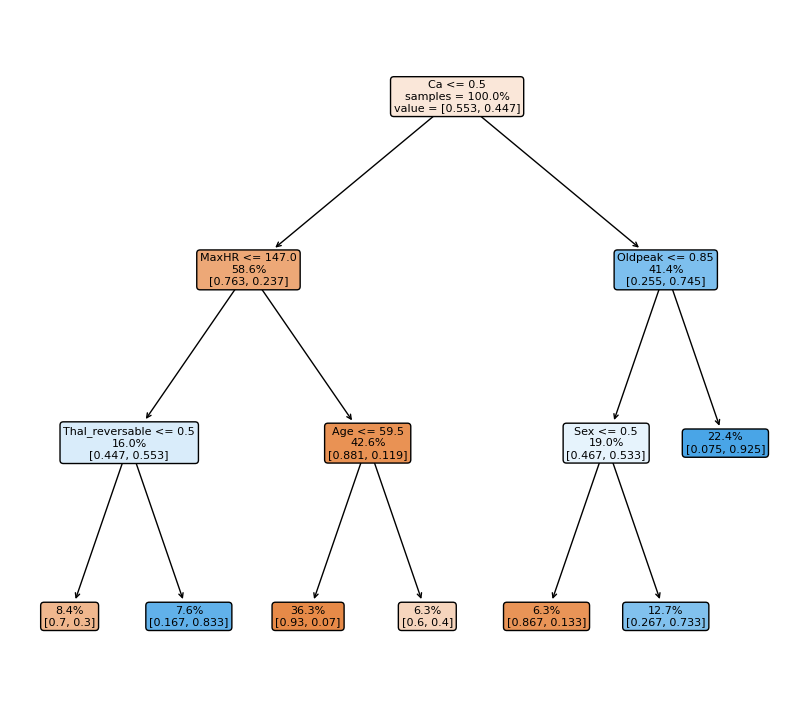

In [32]:
plt.figure(figsize = (10,9)) # Creates a new matplotlib figure with a size of 16 inches by 14 inches.
plot_tree(tree_best, feature_names = X_train.columns.tolist(), impurity = False, label = "root",
          filled = True, proportion = True, rounded = True, fontsize = 8)
# feature_names=X_train.columns.tolist(): Provides the names of the features (i.e., the independent variables) to use as labels for the nodes in the decision tree.
#  impurity = False: Specifies that we don't want to show the impurity (i.e., entropy or Gini index) for each node in the tree.
#   label = "root": Specifies that the root node should be labeled as "root".
#    filled = True: Specifies that we want to color the nodes in the tree based on the majority class of the training samples that fall within them.
#     proportion = True: Specifies that we want to show the proportion of training samples in each node that belong to each class.
#      rounded = True: Specifies that we want to round the corners of the boxes that represent nodes in the tree.
#       fontsize = 8: Specifies the font size to use for the text in the plot.
plt.show() # Displays the plot of the decision tree.

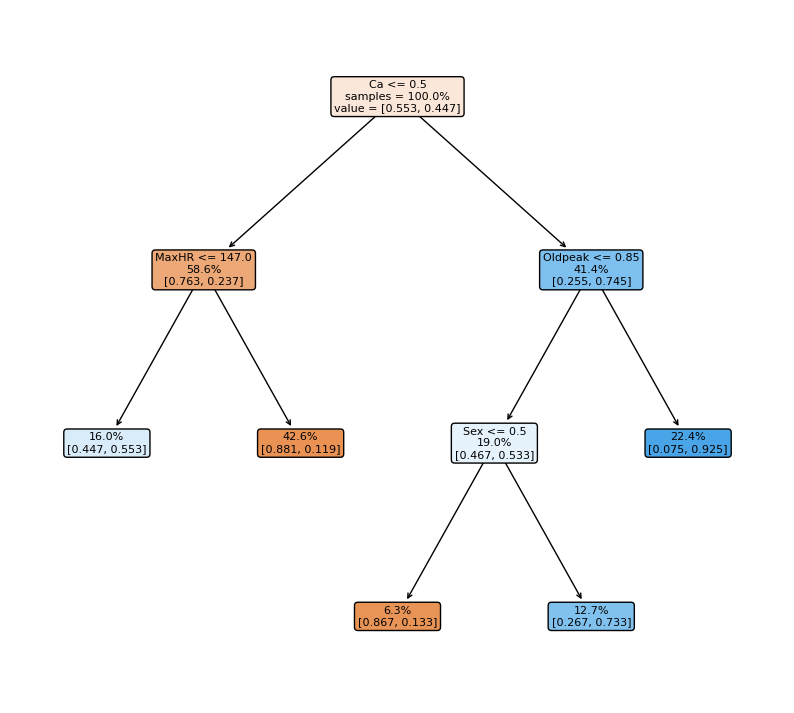

In [33]:
plt.figure(figsize = (10, 9)) # Creates a new matplotlib figure with a size of 16 inches by 14 inches.
plot_tree(tree_best_1se, feature_names = X_train.columns.tolist(), impurity = False, label = "root",
          filled = True, proportion = True, rounded = True, fontsize = 8)
# feature_names=X_train.columns.tolist(): Provides the names of the features (i.e., the independent variables) to use as labels for the nodes in the decision tree.
#  impurity = False: Specifies that we don't want to show the impurity (i.e., entropy or Gini index) for each node in the tree.
#   label = "root": Specifies that the root node should be labeled as "root".
#    filled = True: Specifies that we want to color the nodes in the tree based on the majority class of the training samples that fall within them.
#     proportion = True: Specifies that we want to show the proportion of training samples in each node that belong to each class.
#      rounded = True: Specifies that we want to round the corners of the boxes that represent nodes in the tree.
#       fontsize = 8: Specifies the font size to use for the text in the plot.
plt.show() # Displays the plot of the decision tree.